# Lab 2: Recommender Systems
**Objective:**
This lab explores recommender systems using Movielens datasets, and collaborative filtering.
- Understand how recommender systems work.
- Analyze Movielens dataset.
- Implement collaborative filtering.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Dependencies
First, install required packages:
```python
!pip install pandas numpy scikit-learn surprise matplotlib seaborn scikit-surprise
```

In [2]:
!pip install pandas numpy scikit-learn surprise matplotlib seaborn scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505185 sha256=6beb51417fadd805adc2389b9485fb7241a57bf2e4a4949bd7c51706b3cd8437
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

# Cosine Similarity Example

**Cosine similarity** measures how similar two vectors are by calculating the cosine of the angle between them. The formula is:

$$
\text{cosine_similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}
$$




**Compute the Dot Product**

1.  The dot product of vectors **A** and **B** is calculated as:

   $$
   \mathbf{A} \cdot \mathbf{B} = (1 \times 3) + (2 \times 4) + (3 \times 5) = 26
   $$

2. **Compute the Norm (Magnitude) of Each Vector**

   - **Norm of A:**

     $$
     \|\mathbf{A}\| = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{1 + 4 + 9} = \sqrt{14} \approx 3.74
     $$

   - **Norm of B:**

     $$
     \|\mathbf{B}\| = \sqrt{3^2 + 4^2 + 5^2} = \sqrt{9 + 16 + 25} = \sqrt{50} \approx 7.07
     $$

3. **Calculate the Cosine Similarity**

   Plug the computed values into the cosine similarity formula:

   $$
   \text{cosine_similarity}(A, B) = \frac{26}{\sqrt{14} \times \sqrt{50}} \approx \frac{26}{3.74 \times 7.07} \approx \frac{26}{26.44} \approx 0.983
   $$


In [4]:
# Define two example vectors
A = np.array([1, 2, 3])
B = np.array([3, 4, 5])

# Compute the dot product
dot_product = np.dot(A, B)

# Compute the norms (magnitudes) of each vector
norm_A = np.linalg.norm(A)
norm_B = np.linalg.norm(B)

# Calculate cosine similarity
cosine_similarity = dot_product / (norm_A * norm_B)

print("Vector A:", A)
print("Vector B:", B)
print("Dot product:", dot_product)
print("Norm of A:", norm_A)
print("Norm of B:", norm_B)
print("Cosine Similarity:", cosine_similarity)

Vector A: [1 2 3]
Vector B: [3 4 5]
Dot product: 26
Norm of A: 3.7416573867739413
Norm of B: 7.0710678118654755
Cosine Similarity: 0.9827076298239908


# **Pearson correlation**

#  **Understanding Pearson Correlation in Practice**

##  What is Pearson Correlation?
The **Pearson Correlation Coefficient (PCC)** measures the linear relationship between two sets of data. It is computed using the formula:

$$
PC(A,B) = \frac{\sum (r_A - \bar{r}_A)(r_B - \bar{r}_B)}
{\sqrt{\sum (r_A - \bar{r}_A)^2 \sum (r_B - \bar{r}_B)^2}}
$$

where:
- $( r_A, r_B)$ are the individual ratings of two movies A and B.
- $( \bar{r}_A, \bar{r}_B)$ are the average ratings for movies A and B.
- The denominator normalizes the values.

## **Dataset**
We will compute Pearson Correlation between **Movie 1 and Movie 2** for the following ratings:

| User  | Movie 1 | Movie 2 |
|--------|--------|--------|
| User 1 | 5      | 4      |
| User 2 | 4      | 5      |
| User 3 | 3      | 2      |
| User 4 | 2      | 3      |
| User 5 | 1      | 1      |

---

## **Step 1: Compute the Mean Ratings**
First, we compute the mean of **Movie 1** and **Movie 2**:

$$
\bar{r}_{Movie1} = \frac{5 + 4 + 3 + 2 + 1}{5} = 3
$$

$$
\bar{r}_{Movie2} = \frac{4 + 5 + 2 + 3 + 1}{5} = 3
$$

---

## **Step 2: Compute the Numerator**
We calculate:

$$
\sum (r_A - \bar{r}_A)(r_B - \bar{r}_B)
$$

$$
(5-3)(4-3) + (4-3)(5-3) + (3-3)(2-3) + (2-3)(3-3) + (1-3)(1-3)
$$

$$
= (2)(1) + (1)(2) + (0)(-1) + (-1)(0) + (-2)(-2)
$$

$$
= 2 + 2 + 0 + 0 + 4 = 8
$$

---

## **Step 3: Compute the Denominator**
Now, compute:

$$
\sqrt{\sum (r_A - \bar{r}_A)^2} \times \sqrt{\sum (r_B - \bar{r}_B)^2}
$$

$$
\sqrt{(5-3)^2 + (4-3)^2 + (3-3)^2 + (2-3)^2 + (1-3)^2} \times
\sqrt{(4-3)^2 + (5-3)^2 + (2-3)^2 + (3-3)^2 + (1-3)^2}
$$

$$
\sqrt{(2)^2 + (1)^2 + (0)^2 + (-1)^2 + (-2)^2} \times
\sqrt{(1)^2 + (2)^2 + (-1)^2 + (0)^2 + (-2)^2}
$$

$$
\sqrt{4 + 1 + 0 + 1 + 4} \times \sqrt{1 + 4 + 1 + 0 + 4}
$$

$$
\sqrt{10} \times \sqrt{10} = 10
$$

---

## **Step 4: Compute Pearson Correlation**
$$
PC(Movie1, Movie2) = \frac{8}{10} = 0.8
$$


## **Final Result**
The **Pearson Correlation Coefficient** between **Movie 1 and Movie 2** is **0.8**.

- **A value of 0.8** suggests a strong **positive correlation**, meaning users who liked **Movie 1** also tend to like **Movie 2**.
- A correlation **closer to 1** means a stronger relationship.


In [5]:
# Sample movie rating data
data = {'Movie 1': [5, 4, 3, 2, 1],
        'Movie 2': [4, 5, 2, 3, 1]}

# Creating DataFrame
df = pd.DataFrame(data, index=['User 1', 'User 2', 'User 3', 'User 4', 'User 5'])

def pearson_correlation(df, movie1, movie2):
    """
    Compute the Pearson correlation coefficient between two movies.
    """
    # Extract ratings for the two movies
    movie1_ratings = df[movie1].astype(float)
    movie2_ratings = df[movie2].astype(float)

    # Compute Pearson correlation coefficient
    correlation = np.corrcoef(movie1_ratings, movie2_ratings)[0, 1]
    return correlation


Pearson correlation between 'Movie 1' and 'Movie 2': 0.7999999999999999

Correlation Matrix:
          Movie 1  Movie 2
Movie 1      1.0      0.8
Movie 2      0.8      1.0


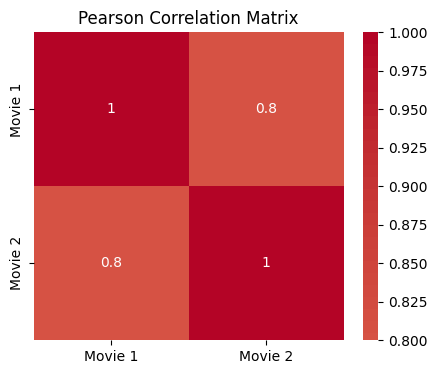

In [6]:
# Calculate and print Pearson correlation between 'Movie 1' and 'Movie 2'
correlation_result = pearson_correlation(df, 'Movie 1', 'Movie 2')
print(f"Pearson correlation between 'Movie 1' and 'Movie 2': {correlation_result}")

# Compute the correlation matrix
correlation_matrix = df.corr(method='pearson')
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

# **User-Based Classification in Collaborative Filtering**

## **Overview**
- In user-based classification, we predict missing ratings based on the ratings of **similar users**.
- We use **weighted voting** to aggregate information from neighbors.

---

## **Mathematical Formula**
The predicted rating $( r^*_{uj})$ is computed using:

$$
vote(j,r,N_j(u)) = \sum_{v \in N_j(u)} \delta(r_{vj} = r) w_{uv}
$$

where:
- $( w_{uv})$ is the **similarity weight** between users \( u \) and \( v \).
- $( r_{vj})$ is the **rating given by user \( v \) for item \( j \)**.
- $( \delta(r_{vj} = r))$ is **1 if $( r_{vj} = r)$, otherwise 0**.

---

## **Example Dataset**
We have the following user-item ratings:

| User  | Rating for item \( p_j \) |
|-------|--------------------------|
| $$(u_5)$$| 3 |
| $$(u_8)$$| 5 |
| $$(u_9)$$| 3 |

And the similarity weights:

- $(w_{i5} = 0.4)$
- $(w_{i8} = 0.9)$
- $(w_{i9} = 0.8)$

We aim to predict the missing rating for **user \( u_i \)** for item \( p_j \).




In [7]:
# Define user-item ratings (rows = users, columns = items)
ratings = pd.DataFrame({
    'User': ['u5', 'u8', 'u9'],
    'Rating': [3, 5, 3]  # Ratings for item p_j
})

# Define user-user similarities
similarities = {'u5': 0.4, 'u8': 0.9, 'u9': 0.8}

# Unique rating categories and initialize vote count
unique_ratings = set(ratings['Rating'])
vote_scores = {r: 0 for r in unique_ratings}

# Compute weighted votes
for index, row in ratings.iterrows():
    user = row['User']
    rating = row['Rating']
    vote_scores[rating] += similarities[user]  # Weighted vote

# Determine the predicted rating (the one with the highest vote)
predicted_rating = max(vote_scores, key=vote_scores.get)

# Display results
print(f"Vote Scores: {vote_scores}")
print(f"Predicted Rating for user u_i and item p_j: {predicted_rating}")

Vote Scores: {3: 1.2000000000000002, 5: 0.9}
Predicted Rating for user u_i and item p_j: 3


## Load Movielens Dataset
We use the Movielens 100K dataset for analysis.

In [8]:
# Load dataset
df = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.data", sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df.drop(columns=['timestamp'], inplace=True)
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB
None


In [10]:
print(df.describe())

            user_id        item_id         rating
count  100000.00000  100000.000000  100000.000000
mean      462.48475     425.530130       3.529860
std       266.61442     330.798356       1.125674
min         1.00000       1.000000       1.000000
25%       254.00000     175.000000       3.000000
50%       447.00000     322.000000       4.000000
75%       682.00000     631.000000       4.000000
max       943.00000    1682.000000       5.000000


## Step 3: Data Exploration
- Visualize rating distribution.

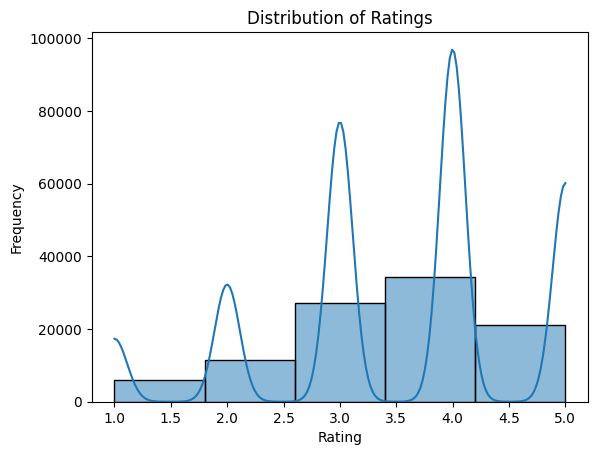

In [11]:
# Visualize ratings distribution
sns.histplot(df['rating'], bins=5, kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

**Observations**


1.   Users tend to rate movies more favorably (3.0–4.0) rather than giving extremely low or high ratings.
2.   The distribution skews slightly toward higher ratings, which is typical in many rating datasets (people often avoid giving the lowest possible rating unless they strongly dislike a movie).
3.   The spike near 4.0 suggests that “good” or “above-average” ratings are most frequent.

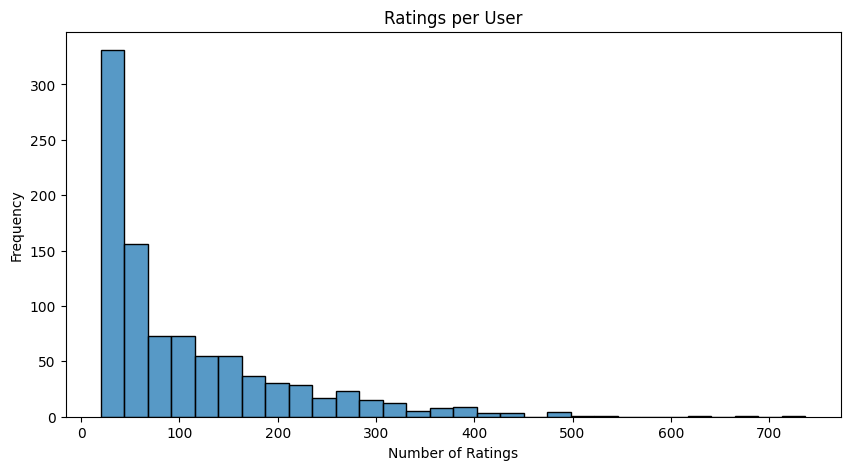

In [12]:
# Number of ratings per user
ratings_per_user = df.groupby('user_id').size()
plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_user, bins=30)
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

**Observations:**

1.   Most users have rated only a small number of movies (the highest bars are on the left side for fewer ratings).
2.   As the number of ratings increase, fewer and fewer users are in that category (the tail to the right represents “power users” who have rated many items).
3.   Many users contribute only a few ratings, and a relatively small group of users are extremely active, contributing a large number of ratings.
4.   This is a common pattern in user-generated data, where a small proportion of users are responsible for the bulk of the ratings.

# Creating a Utility Matrix

**Transform the ratings data into a user-item matrix where rows represent users, columns represent movies, and the values are the ratings.**



In [13]:
utility_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
print(utility_matrix.head())

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   N

# Sparsity in Recommender Systems

**Definition:**
- **Sparsity** refers to the phenomenon where a user-item rating matrix contains a very high proportion of missing values (i.e., most users have rated only a few items).

**Why Sparsity Occurs:**
- In many domains (like movies, music, or e-commerce), the total number of available items is vast.
- Most users interact with or rate only a small subset of these items.
- As a result, when you construct a matrix with users as rows and items as columns, most of the cells remain empty.

**Example Calculation:**
Imagine a movie recommendation system with:
- **10,000 users**
- **1,000 movies**

If each user rates an average of **50 movies**, then:
- **Total possible ratings:** 10,000 × 1,000 = 10,000,000
- **Actual ratings:** 10,000 × 50 = 500,000

The sparsity level can be calculated as:
$$
\text{Sparsity} = 1 - \frac{\text{Number of actual ratings}}{\text{Total possible ratings}} = 1 - \frac{500,000}{10,000,000} = 1 - 0.05 = 0.95
$$
This means the matrix is **95% sparse**, with only 5% of the entries filled.

**Implications in Recommender Systems:**
- **Similarity Computation:** Collaborative filtering algorithms (both user–user and item–item) rely on overlapping ratings to compute similarities. High sparsity means fewer overlaps, which can reduce the accuracy of similarity estimates.
- **Cold-Start Problem:** Sparsity exacerbates the cold-start problem, where new users or items have very little data, making it harder to provide accurate recommendations.
- **Techniques to Mitigate Sparsity:**  
  - **Matrix Factorization:** Methods like Singular Value Decomposition (SVD) help uncover latent factors that can predict missing ratings.
  - **Hybrid Approaches:** Combining collaborative filtering with content-based methods can help overcome limitations caused by sparse data.
  - **Data Imputation:** Some techniques fill in missing values with approximations to reduce the impact of sparsity.



In [14]:
# Calculate sparsity
sparsity = utility_matrix.isnull().sum().sum() / (utility_matrix.shape[0] * utility_matrix.shape[1])
print(f"Sparsity of the utility matrix: {sparsity:.2%}")

Sparsity of the utility matrix: 93.70%


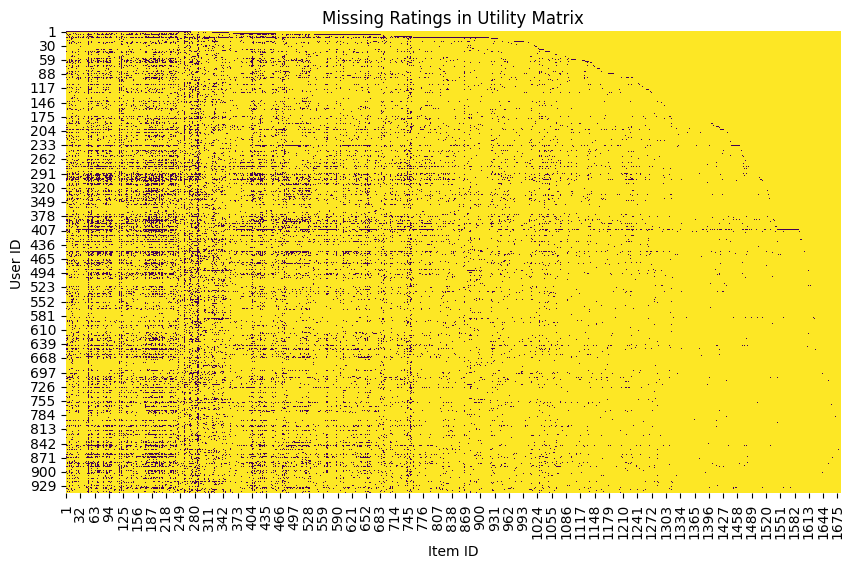

In [15]:
# Analyze rating distribution within the matrix
plt.figure(figsize=(10, 6))
sns.heatmap(utility_matrix.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Ratings in Utility Matrix')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

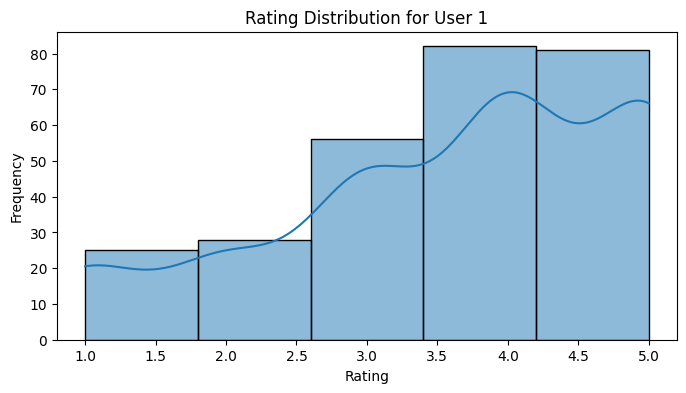

User 1 rated 272 movies.


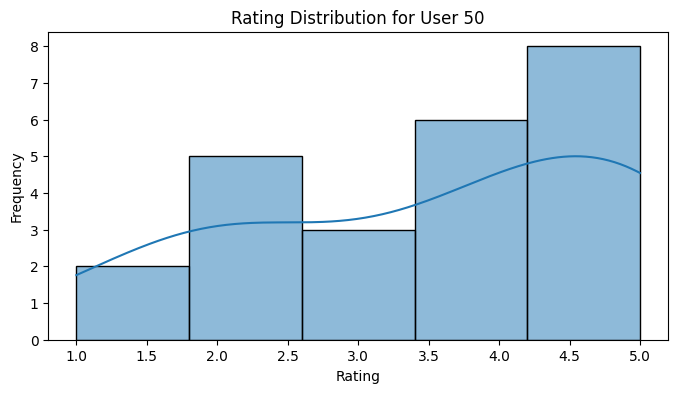

User 50 rated 24 movies.


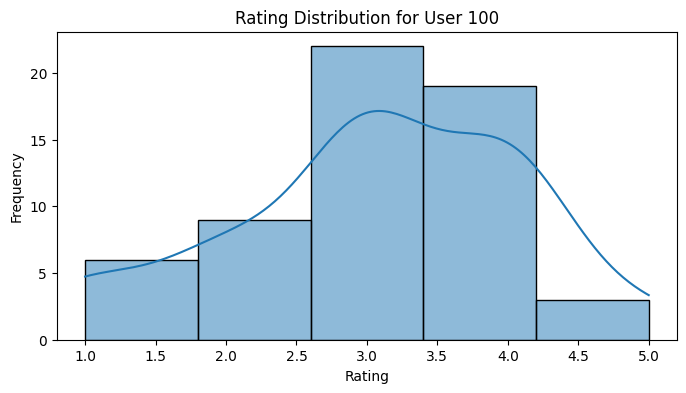

User 100 rated 59 movies.


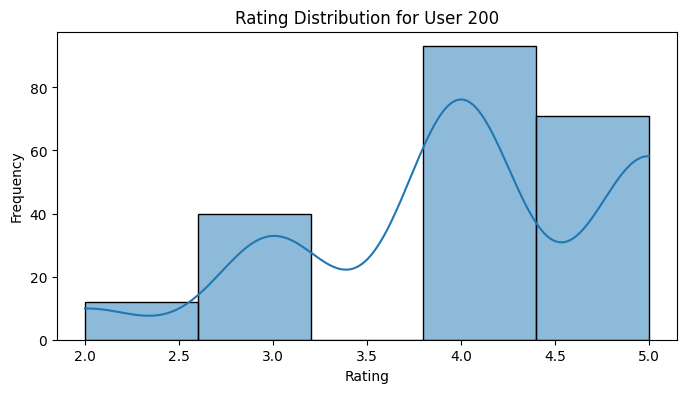

User 200 rated 216 movies.


In [16]:
# Examine the distribution of ratings for a few selected users
user_ids = [1, 50, 100, 200] # You can change these to explore different users
for user_id in user_ids:
    user_ratings = utility_matrix.loc[user_id].dropna()
    plt.figure(figsize=(8, 4))
    sns.histplot(user_ratings, bins=5, kde=True)
    plt.title(f'Rating Distribution for User {user_id}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
    print(f"User {user_id} rated {len(user_ratings)} movies.")

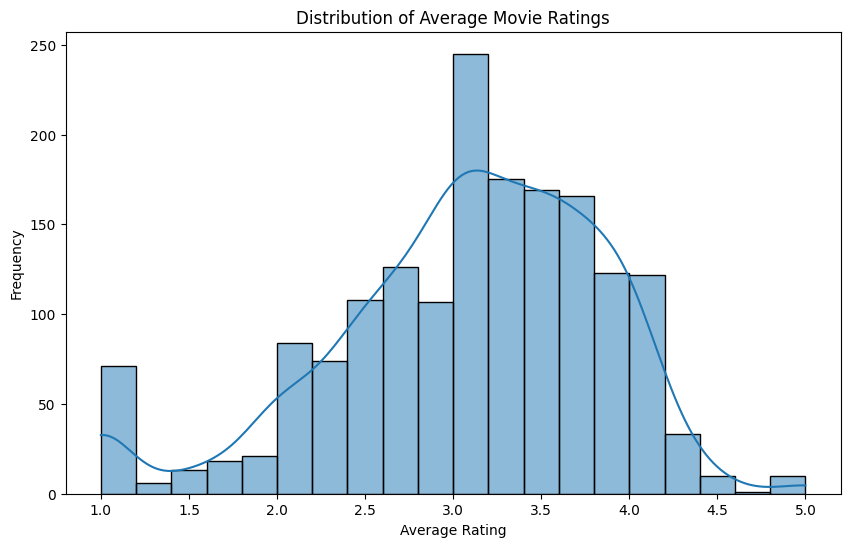

count    1682.000000
mean        3.076045
std         0.781662
min         1.000000
25%         2.659600
50%         3.161528
75%         3.653428
max         5.000000
dtype: float64


In [17]:
# Calculate average rating per movie
avg_movie_ratings = utility_matrix.mean(axis=0).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(avg_movie_ratings, bins=20, kde=True)
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()
print(avg_movie_ratings.describe())

In [18]:
# Explore movies with the highest and lowest average ratings
print("Top 5 highest rated movies:")
print(avg_movie_ratings.nlargest(5))

print("\nTop 5 lowest rated movies:")
print(avg_movie_ratings.nsmallest(5))

Top 5 highest rated movies:
item_id
814     5.0
1122    5.0
1189    5.0
1201    5.0
1293    5.0
dtype: float64

Top 5 lowest rated movies:
item_id
314    1.0
437    1.0
439    1.0
599    1.0
784    1.0
dtype: float64


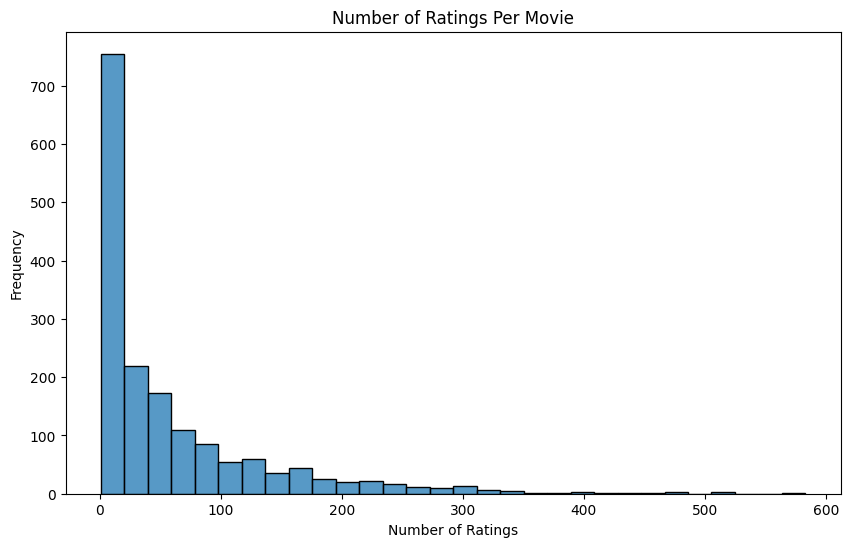

In [19]:
# Number of ratings per movie
num_ratings_per_movie = utility_matrix.count(axis=0).dropna()
plt.figure(figsize=(10,6))
sns.histplot(num_ratings_per_movie, bins=30)
plt.title('Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


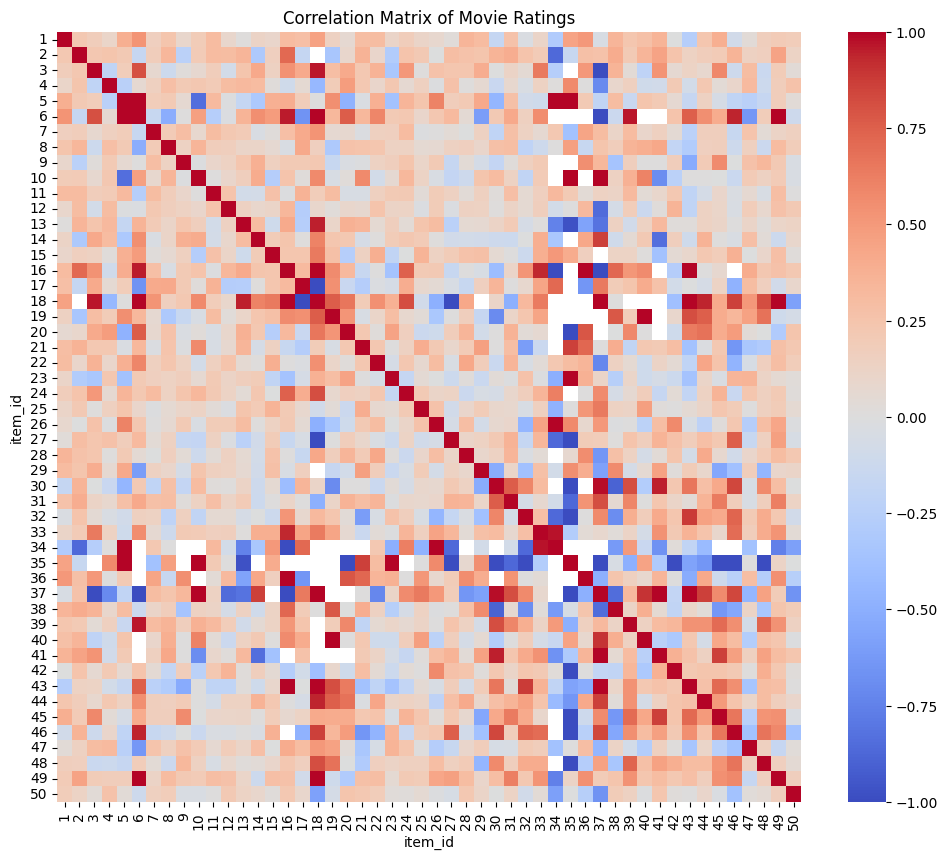

In [20]:
# Correlation between ratings of different movies
movie_correlations = utility_matrix.corr()

# Display a heatmap of movie correlations (for a subset of movies due to size)
plt.figure(figsize=(12, 10))
sns.heatmap(movie_correlations.iloc[:50, :50], cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Movie Ratings")
plt.show()

In [21]:
# Identify potential outliers in the ratings data
# Method 1: Using IQR (Interquartile Range)
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rating'] < lower_bound) | (df['rating'] > upper_bound)]
print("Outliers based on IQR method:")
print(outliers)

Outliers based on IQR method:
       user_id  item_id  rating
2           22      377       1
4          166      346       1
36         181     1081       1
38         276      796       1
61          20      288       1
...        ...      ...     ...
99926      868      405       1
99965      934      216       1
99970      449      120       1
99982      279       64       1
99997      276     1090       1

[6110 rows x 3 columns]


In [22]:
# Method 2: Using Z-score
from scipy import stats
z = np.abs(stats.zscore(df['rating']))
outliers_zscore = df[(z > 2.22)] # Consider values with a Z-score greater than 3 as outliers
print("\nOutliers based on Z-score method:")
outliers_zscore


Outliers based on Z-score method:


,user_id,item_id,rating
2,22,377,1
4,166,346,1
36,181,1081,1
38,276,796,1
61,20,288,1
...,...,...,...
99926,868,405,1
99965,934,216,1
99970,449,120,1
99982,279,64,1


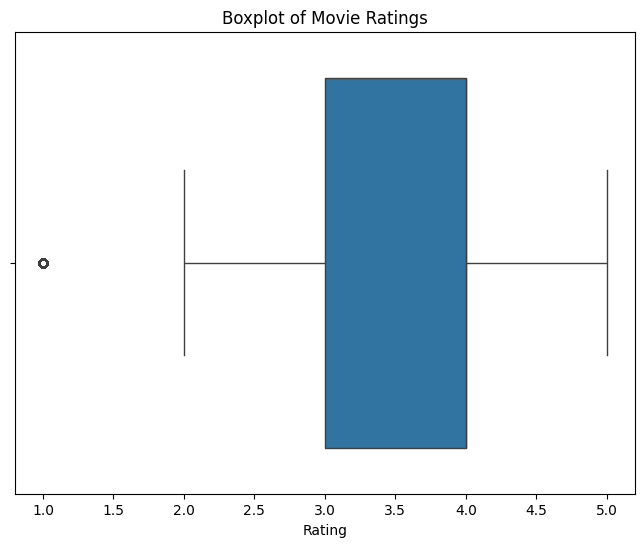

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.show()


# Building Basic Recommender Systems

# In this section, we will build two recommendation systems:
**User–User Collaborative Filtering**

 **Item–Item Collaborative Filtering**




**User–User Collaborative Filtering**

**We compute the similarity between users using cosine similarity (after filling missing values) and predict a user's rating based on similar users**


In [24]:
# Fill missing values with 0 for similarity computation
utility_matrix_filled = utility_matrix.fillna(0)
utility_matrix_filled.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(utility_matrix_filled)
user_similarity

array([[1.        , 0.16693098, 0.04745954, ..., 0.14861694, 0.17950788,
        0.39817474],
       [0.16693098, 1.        , 0.11059132, ..., 0.16148478, 0.17226781,
        0.10579788],
       [0.04745954, 0.11059132, 1.        , ..., 0.10124256, 0.13341615,
        0.02655587],
       ...,
       [0.14861694, 0.16148478, 0.10124256, ..., 1.        , 0.1016418 ,
        0.09511958],
       [0.17950788, 0.17226781, 0.13341615, ..., 0.1016418 , 1.        ,
        0.18246466],
       [0.39817474, 0.10579788, 0.02655587, ..., 0.09511958, 0.18246466,
        1.        ]])

In [26]:
# Convert the similarity matrix to a DataFrame for easier inspection
user_similarity_df = pd.DataFrame(user_similarity, index=utility_matrix.index, columns=utility_matrix.index)
print(user_similarity_df.head())

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.166931  0.047460  0.064358  0.378475  0.430239  0.440367   
2        0.166931  1.000000  0.110591  0.178121  0.072979  0.245843  0.107328   
3        0.047460  0.110591  1.000000  0.344151  0.021245  0.072415  0.066137   
4        0.064358  0.178121  0.344151  1.000000  0.031804  0.068044  0.091230   
5        0.378475  0.072979  0.021245  0.031804  1.000000  0.237286  0.373600   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.319072  0.078138  0.376544  ...  0.369527  0.119482  0.274876   
2        0.103344  0.161048  0.159862  ...  0.156986  0.307942  0.358789   
3        0.083060  0.061040  0.065151  ...  0.031875  0.042753  0.163829   
4        0.188060  0.101284  0.060859  ...  0.052107

In [27]:
#defining a prediction method
def predict_rating_user_based(user_id, movie_id, utility_matrix, similarity_df):
    # Get users who have rated the movie
    similar_users = utility_matrix[movie_id].dropna().index
    if similar_users.empty:
        return None  # Cannot predict if no similar users have rated the movie

    # Get similarity scores for these users relative to the target user
    sim_scores = similarity_df.loc[user_id, similar_users]

    # Get ratings for the movie from these users
    ratings_for_movie = utility_matrix.loc[similar_users, movie_id]

    # Compute weighted average prediction
    predicted_rating = np.dot(sim_scores, ratings_for_movie) / sim_scores.sum()
    return predicted_rating

In [28]:
# Example: Predict rating for user 1 on movie 50 using user-based CF
predicted_user = predict_rating_user_based(1, 50, utility_matrix, user_similarity_df)
print(f'User-based predicted rating for user 1 on movie 50: {predicted_user}')

User-based predicted rating for user 1 on movie 50: 4.399876853502444


**Item–Item Collaborative Filtering**

**For item–item collaborative filtering, we compute the similarity between items (movies) and predict a rating for a user based on ratings given to similar items**.

**We first create an item-item similarity matrix by transposing the utility matrix.**


In [29]:
# Transpose the utility matrix so that items are rows and fill missing values with 0
item_utility_matrix = utility_matrix.fillna(0).T
item_utility_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Compute the item-item similarity matrix using cosine similarity
item_similarity = cosine_similarity(item_utility_matrix)
item_similarity

array([[1.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 1.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 1.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# Convert to a DataFrame for easier inspection
item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)
print(item_similarity_df.head())

item_id      1         2         3         4         5         6         7     \
item_id                                                                         
1        1.000000  0.402382  0.330245  0.454938  0.286714  0.116344  0.620979   
2        0.402382  1.000000  0.273069  0.502571  0.318836  0.083563  0.383403   
3        0.330245  0.273069  1.000000  0.324866  0.212957  0.106722  0.372921   
4        0.454938  0.502571  0.324866  1.000000  0.334239  0.090308  0.489283   
5        0.286714  0.318836  0.212957  0.334239  1.000000  0.037299  0.334769   

item_id      8         9         10    ...      1673  1674      1675  \
item_id                                ...                             
1        0.481114  0.496288  0.273935  ...  0.035387   0.0  0.000000   
2        0.337002  0.255252  0.171082  ...  0.000000   0.0  0.000000   
3        0.200794  0.273669  0.158104  ...  0.000000   0.0  0.000000   
4        0.490236  0.419044  0.252561  ...  0.000000   0.0  0.094022   


In [32]:
#Defining method for item-item collaboration filtering
def predict_rating_item_based(user_id, movie_id, utility_matrix, item_similarity_df):
    # Get the user's ratings
    user_ratings = utility_matrix.loc[user_id]
    # Get the list of movies the user has rated
    rated_items = user_ratings[user_ratings.notna()].index
    if rated_items.empty:
        return None  # Cannot predict if user hasn't rated any items

    # Similarity scores for the target movie with all rated items
    sim_scores = item_similarity_df.loc[movie_id, rated_items]
    # User's ratings for these items
    ratings_for_rated = user_ratings[rated_items]

    # Compute weighted average prediction
    predicted_rating = np.dot(sim_scores, ratings_for_rated) / sim_scores.sum()
    return predicted_rating

In [33]:
# Example: Predict rating for user 1 on movie 50 using item-based CF
predicted_item = predict_rating_item_based(1, 50, utility_matrix, item_similarity_df)
print(f'Item-based predicted rating for user 1 on movie 50: {predicted_item}')

Item-based predicted rating for user 1 on movie 50: 3.7940432460459097


# **Building a Simple recommender system**

1. **Creating Train/test split**

In [34]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Reset index for better handling
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Check the size of each dataset
print(f"Train set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")


Train set size: (80000, 3)
Test set size: (20000, 3)


**Step 1: Implement Popularity-Based Recommendation System**

**A popularity-based recommendation system recommends items based on their overall popularity, rather than personalizing recommendations for each user.**

-How It Works?

1.   It calculates the average rating or total number of ratings for each item.
2.   Rank items by their popularity (e.g., highest average rating).
3. Recommend the top-N most popular items to all users.






In [35]:
# Compute average rating per item
popularity_df = train_df.groupby("item_id")["rating"].agg(["mean", "count"]).reset_index()
popularity_df.rename(columns={"mean": "avg_rating", "count": "num_ratings"}, inplace=True)

# Sort by highest average rating (popularity)
top_items = popularity_df.sort_values(by=["avg_rating", "num_ratings"], ascending=[False, False])

# Display the top 10 most popular items
print(top_items.head(30))


      item_id  avg_rating  num_ratings
848       850    5.000000            2
1186     1189    5.000000            2
1290     1293    5.000000            2
1490     1500    5.000000            2
1594     1612    5.000000            2
1198     1201    5.000000            1
1303     1306    5.000000            1
1458     1467    5.000000            1
1611     1629    5.000000            1
1620     1642    5.000000            1
1629     1653    5.000000            1
1441     1449    4.666667            6
113       114    4.509804           51
1291     1294    4.500000            2
1391     1398    4.500000            2
1580     1594    4.500000            2
317       318    4.474576          236
319       320    4.466667           15
63         64    4.456140          228
482       483    4.428571          189
407       408    4.416667           84
11         12    4.410959          219
168       169    4.387097           93
133       134    4.379747          158
602       603    4.377246

**Step 2: Predict Ratings in the Test Set**

In [36]:
# Create a dictionary of item_id -> avg_rating
item_avg_rating = top_items.set_index("item_id")["avg_rating"].to_dict()

# Predict ratings in the test set
test_df["predicted_rating"] = test_df["item_id"].map(item_avg_rating)

# If an item in the test set wasn't seen in training, fill it with the global average rating
global_avg_rating = train_df["rating"].mean()
test_df["predicted_rating"].fillna(global_avg_rating, inplace=True)

**Step 3: Compute Evaluation Metrics**

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute MAE
mae_value = mean_absolute_error(test_df["rating"], test_df["predicted_rating"])

# Compute RMSE
rmse_value = np.sqrt(mean_squared_error(test_df["rating"], test_df["predicted_rating"]))

print(f"MAE: {mae_value:.4f}")
print(f"RMSE: {rmse_value:.4f}")


MAE: 0.8123
RMSE: 1.0210



**1. MAE measures the average absolute difference between predicted and actual ratings**

*   MAE of 0.8123 means that, on average, the predicted ratings differ from actual ratings by around 0.81 stars.
*   Since the ratings range from 1 to 5, an MAE of ~0.8 is moderate but not perfect.

**2. RMSE gives more weight to larger errors compared to MAE (since it squares the errors before averaging). A lower RMSE is better, meaning that predictions are closer to actual ratings.**

1.   RMSE of 1.0210 means that, on average, the squared difference between the predicted and actual rating is around 1 star.


**Step 4: Compute Precision & Recall at k**

In [38]:
def precision_recall_at_k(test_df, top_k=5):
    # Define relevance threshold (e.g., rating >= 4 means relevant)
    test_df["relevant"] = test_df["rating"] >= 4

    # Get top-k predicted items for each user
    user_top_k = test_df.groupby("user_id").apply(
        lambda x: x.nlargest(top_k, "predicted_rating")
    ).reset_index(level=0, drop=True) # Reset the index to remove 'user_id' from the index

    # Compute Precision@K and Recall@K
    precision_list = []
    recall_list = []

    # Iterate through unique users in the test set
    for user in test_df["user_id"].unique():
        group = user_top_k[user_top_k.index == user] # Select the rows of a user
        relevant_items = group["relevant"].sum()
        total_recommended = top_k
        total_relevant = test_df[test_df["user_id"] == user]["relevant"].sum()

        precision = relevant_items / total_recommended if total_recommended > 0 else 0
        recall = relevant_items / total_relevant if total_relevant > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Compute average Precision@K and Recall@K
    precision_at_k = np.mean(precision_list)
    recall_at_k = np.mean(recall_list)

    return precision_at_k, recall_at_k

# Compute precision and recall at k=5
precision_at_5, recall_at_5 = precision_recall_at_k(test_df, top_k=5)

print(f"Precision@5: {precision_at_5:.4f}")
print(f"Recall@5: {recall_at_5:.4f}")


Precision@5: 0.0321
Recall@5: 0.0345


**What Does Precision@5 Mean?**

***Precision@K = (Relevant Items in Top-K) / (Total Recommended Items in Top-K)***


Suppose we recommend 5 movies to a user.

Out of those, the user finds 1 movie relevant (rated ≥ 4).

Precision@5 = 1/5 = 0.20 (20%).

Our Precision@5 = 3.21%

---

# **This means that only ~3.21% of the top 5 recommended movies are actually relevant.**


---


**What Does Recall@5 Mean?**
***Recall@K = (Relevant Items in Top-K) / (Total Relevant Items in the Test Set for that User)***

Suppose a user has 10 relevant movies (rated ≥ 4) in the test set.

Our system recommends 5 movies, but only 1 of them is actually relevant.
Recall@5 = 1/10 = 0.10 (10%).



---


Our Recall@5 = 3.45%


---

# **This means that only ~3.45% of the relevant movies for each user were actually included in the top 5 recommendations.**

# **User-User Collaborative Filtering**

**Train a User-Based Collaborative Filtering Model**

In [39]:
from surprise import Dataset, Reader, SVD, KNNBasic # Import KNNBasic here
# Convert the training data to a Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)

# Train the SVD model
model = KNNBasic()
model.fit(data.build_full_trainset())

# Make predictions on the test set
predictions = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = model.predict(user_id, item_id)
    predictions.append(prediction.est)

# Add predictions to the test set
test_df['predicted_rating'] = predictions

# Evaluate the model
mae = mean_absolute_error(test_df['rating'], test_df['predicted_rating'])
rmse = np.sqrt(mean_squared_error(test_df['rating'], test_df['predicted_rating']))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE: 0.7688824805866737
RMSE: 0.9747521491655079


**Make Predictions on the Test Set**

In [40]:
predictions

[3.8005522007995016,
 3.7685324864360723,
 3.419559155632004,
 2.8658553133315157,
 4.181445772656395,
 2.9634089234177172,
 3.9040462427745695,
 4.077386939292032,
 3.771761014287245,
 3.368644420391486,
 3.289839960219481,
 3.6260037325823737,
 3.525900999962532,
 3.689273058368358,
 3.629162928282435,
 3.828670354598637,
 4.088056654364753,
 4.1595445511674605,
 3.698857387041612,
 3.2850814056256046,
 3.7031702015380836,
 2.683553128293021,
 4.166382356288801,
 4.00609345402039,
 3.865832474661904,
 4.435110185959176,
 4.264247652487533,
 3.951121404940135,
 3.63969503426901,
 3.991628287087064,
 3.175966379019527,
 3.5213645407736043,
 3.180306154735242,
 3.5484666877457327,
 1.7928352611020628,
 2.9238708646235345,
 3.0726573256344034,
 4.013319599915621,
 3.492148166570439,
 4.232601569104024,
 4.6720951380451465,
 3.685584590116778,
 2.847904240410652,
 3.1635170351809054,
 3.8686909659396465,
 3.3542183966413317,
 2.868224698997776,
 4.141458094691175,
 3.630255767839262,
 3.3

In [41]:
# Convert predictions to DataFrame for evaluation
pred_df = pd.DataFrame(predictions, columns=["predicted_rating"])
pred_df["user_id"] = test_df["user_id"]
pred_df["item_id"] = test_df["item_id"]
pred_df["actual_rating"] = test_df["rating"]
# Reorder columns
pred_df = pred_df[["user_id", "item_id", "actual_rating", "predicted_rating"]]

# Now you have the predictions in the desired format within pred_df
print(pred_df.head())


   user_id  item_id  actual_rating  predicted_rating
0      877      381              4          3.800552
1      815      602              3          3.768532
2       94      431              4          3.419559
3      416      875              2          2.865855
4      500      182              2          4.181446


**Evaluate the Performance**

In [42]:
# Compute MAE
mae_value = mean_absolute_error(pred_df["actual_rating"], pred_df["predicted_rating"])

# Compute RMSE
rmse_value = np.sqrt(mean_squared_error(pred_df["actual_rating"], pred_df["predicted_rating"]))

print(f"MAE: {mae_value:.4f}")
print(f"RMSE: {rmse_value:.4f}")


MAE: 0.7689
RMSE: 0.9748


## Understanding MAE & RMSE in User-User Collaborative Filtering

After training a **User-Based Collaborative Filtering Model**, we evaluate its performance using **Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).**

### 🔹 MAE: 0.7689
- **MAE (Mean Absolute Error)** measures the **average absolute difference** between the predicted and actual ratings.
- A **MAE of 0.7689** means that, on average, our predicted ratings **differ from actual ratings by ~0.77 stars**.
- **Lower MAE is better**, indicating more accurate predictions.

### 🔹 RMSE: 0.9748
- **RMSE (Root Mean Squared Error)** penalizes **larger errors** more than MAE.
- An **RMSE of 0.9748** means that the squared difference between the predicted and actual rating is around **0.97 stars on average**.
- RMSE is usually **higher than MAE** since it squares the errors before averaging.

---

## How Good Is This Model?
- **Compared to the Popularity-Based Model:**
  - The **User-Based CF model has a lower MAE & RMSE**, meaning it provides **better personalized recommendations**.
  - **Previous Popularity-Based Model**: **MAE = 0.8123, RMSE = 1.0210**
  - ✅ **Improvement observed!**
- **A Good RMSE Target**:  
  - **Below 1.0** is acceptable for recommendation systems.  
  - **Best models** achieve **RMSE ≈ 0.8 or lower**.

---


 **Compute Precision@K & Recall@K**

In [43]:
def precision_recall_at_k(pred_df, top_k=5):
    # Define relevance threshold (e.g., rating >= 4 is relevant)
    pred_df["relevant"] = pred_df["actual_rating"] >= 4

    # Get top-k predicted items for each user
    user_top_k = pred_df.groupby("user_id").apply(
        lambda x: x.nlargest(top_k, "predicted_rating")
    ).reset_index(level=0, drop=True)

    # Compute Precision@K and Recall@K
    precision_list = []
    recall_list = []

    for user in pred_df["user_id"].unique():
        group = user_top_k[user_top_k["user_id"] == user]
        relevant_items = group["relevant"].sum()
        total_recommended = top_k
        total_relevant = pred_df[pred_df["user_id"] == user]["relevant"].sum()

        precision = relevant_items / total_recommended if total_recommended > 0 else 0
        recall = relevant_items / total_relevant if total_relevant > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Compute average Precision@K and Recall@K
    precision_at_k = np.mean(precision_list)
    recall_at_k = np.mean(recall_list)

    return precision_at_k, recall_at_k

# Compute Precision@5 and Recall@5
precision_at_5, recall_at_5 = precision_recall_at_k(pred_df, top_k=5)

print(f"Precision@5: {precision_at_5:.4f}")
print(f"Recall@5: {recall_at_5:.4f}")


Precision@5: 0.6919
Recall@5: 0.5146


## Understanding Precision@5 and Recall@5 in User-User Collaborative Filtering

After evaluating our **User-Based Collaborative Filtering Model**, we analyze its **Precision@5** and **Recall@5** to measure the effectiveness of recommendations.

### 🔹 Precision@5: 0.6919
- **Precision@5** measures the proportion of recommended items that are actually relevant.
- A **Precision@5 of 0.6919 (69.19%)** means that **69.19% of the top 5 recommended movies were actually relevant** (i.e., rated **≥ 4** by the user).
- **Higher Precision is better** because it means we are recommending more relevant items.

### 🔹 Recall@5: 0.5146
- **Recall@5** measures how many of the relevant items were successfully recommended.
- A **Recall@5 of 0.5146 (51.46%)** means that **51.46% of all relevant items (movies rated ≥ 4 by the user) were included in the top 5 recommendations**.
- **Higher Recall is better** because it means we are not missing too many relevant recommendations.

---

## How Good Is This Model?
- Compared to **popularity-based recommendations**, the **User-Based CF model has significantly higher Precision and Recall**.
- **Precision@5 = 69.19%** means that most of the recommended items are relevant.
- **Recall@5 = 51.46%** means the system is retrieving a good portion of relevant items.
- **A balanced Precision & Recall is ideal for a good recommendation system.**

---

# **Item-Item Collaborative Filtering**

**Train and test a KNNbasic model for item-item CF**

In [44]:
# Convert the training data to a Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)

# Define Item-Item Collaborative Filtering Model
sim_options = {
    "name": "cosine",  # Use Cosine Similarity
    "user_based": False,  # Set to False for Item-Item CF
}

# Train the Item-Item CF model
model = KNNBasic(sim_options=sim_options)
model.fit(data.build_full_trainset())

# Make predictions on the test set
predictions_item = [] # Initialize predictions_item as a list to store predictions
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = model.predict(user_id, item_id) # Get prediction for user and item
    predictions_item.append(prediction.est) # Append the estimated rating to the list

# Add predictions to the test set
test_df['predicted_rating'] = predictions_item

# Evaluate the model
mae = mean_absolute_error(test_df['rating'], test_df['predicted_rating'])
rmse = np.sqrt(mean_squared_error(test_df['rating'], test_df['predicted_rating']))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE: 0.8095
RMSE: 1.0234


In [45]:
# Convert predictions to DataFrame for evaluation
pred_items_df = pd.DataFrame(predictions_item, columns=["predicted_rating"])
pred_items_df["user_id"] = test_df["user_id"]
pred_items_df["item_id"] = test_df["item_id"]
pred_items_df["actual_rating"] = test_df["rating"]
# Reorder columns
pred_items_df = pred_items_df[["user_id", "item_id", "actual_rating", "predicted_rating"]]

# Now you have the predictions in the desired format within pred_df
print(pred_items_df.head())
print(pred_items_df.shape)

   user_id  item_id  actual_rating  predicted_rating
0      877      381              4          4.025976
1      815      602              3          3.897426
2       94      431              4          3.471667
3      416      875              2          3.424911
4      500      182              2          3.620338
(20000, 4)


In [46]:
def precision_recall_at_k(pred_items_df, top_k=5):
    # Define relevance threshold (e.g., rating >= 4 is relevant)
    pred_items_df.loc[:, "relevant"] = pred_items_df["actual_rating"] >= 4

    # Get top-k predicted items for each user
    user_top_k = pred_items_df.groupby("user_id").apply(
        lambda x: x.nlargest(top_k, "predicted_rating")
    ).reset_index(level=0, drop=True)

    # Compute Precision@K and Recall@K
    precision_list = []
    recall_list = []

    for user in pred_items_df["user_id"].unique():
        group = user_top_k[user_top_k["user_id"] == user]
        relevant_items = group["relevant"].sum()
        total_recommended = top_k
        total_relevant = pred_items_df[pred_items_df["user_id"] == user]["relevant"].sum()

        precision = relevant_items / total_recommended if total_recommended > 0 else 0
        recall = relevant_items / total_relevant if total_relevant > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Compute average Precision@K and Recall@K
    precision_at_k = np.mean(precision_list)
    recall_at_k = np.mean(recall_list)

    return precision_at_k, recall_at_k

# Compute Precision@5 and Recall@5
precision_at_5, recall_at_5 = precision_recall_at_k(pred_items_df, top_k=5)

print(f"Precision@5: {precision_at_5:.4f}")
print(f"Recall@5: {recall_at_5:.4f}")


Precision@5: 0.6513
Recall@5: 0.4909


##  How Does Item-Item CF Compare to User-User CF?

| **Model**         | **Precision@5**    | **Recall@5**     |
|------------------|-----------------|----------------|
| **User-User CF** | **0.6919 (69.19%)** | **0.5146 (51.46%)** |
| **Item-Item CF** | **0.6513 (65.13%)** | **0.4909 (49.09%)** |

### 🔹 Observations
- **User-User CF has slightly better Precision (69.19% vs. 65.13%)**  
  → Meaning that user-based CF recommends slightly more relevant movies.  
- **User-User CF also has slightly better Recall (51.46% vs. 49.09%)**  
  → Meaning it finds more of the relevant movies for each user.  

**User-User CF is performing slightly better than Item-Item CF.**  
**However, Item-Item CF is often more stable** because **items are more consistent over time compared to user preferences**.
